<a href="https://colab.research.google.com/github/HAJARELFATHI/PROBLEM-SOLVING/blob/main/Copie_de_ProblemSolving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cophenet
import numpy as np

In [4]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Specify the path to your CSV file on Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/student_data.csv'

# Read the CSV file into a DataFrame
import pandas as pd
student_df = pd.read_csv(file_path)

# Now, 'df' contains your dataset


Mounted at /content/drive


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
print(student_df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [7]:
student_df.columns.tolist()

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

Cette table contient 33 colonnes

In [8]:
numerical_features = student_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numerical_features)
print(len(numerical_features))

['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
16


On a 16 variables numériques et 14 variables catégoriques

In [9]:
print(student_df.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

In [10]:
print("Le nombre de valeurs manquantes est : ")
print(student_df.isnull().sum().sum())

Le nombre de valeurs manquantes est : 
0


On n'a pas de valeurs manquantes

In [11]:
student_df = student_df.drop(['guardian','schoolsup' , 'paid' , 'nursery' ,'higher' ,'romantic' ,'Dalc' ,'Walc','G1','G2'],1)

<ipython-input-11-607c0ad87f7b>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  student_df = student_df.drop(['guardian','schoolsup' , 'paid' , 'nursery' ,'higher' ,'romantic' ,'Dalc' ,'Walc','G1','G2'],1)


In [12]:
print("La table contient maintenant ",len(student_df.columns.tolist()), " colonnes")
numerical_features = student_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = student_df.select_dtypes(include='object').columns.tolist()
print(numerical_features)
print("On a ",len(numerical_features)," variables numériques")
print(categorical_features)
print("On a ",len(categorical_features)," variables catégoriques")

La table contient maintenant  23  colonnes
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'G3']
On a  12  variables numériques
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'famsup', 'activities', 'internet']
On a  11  variables catégoriques


On a enlevé 8 variables qui n'ont pas de relation avec le contexte de notre étude. La table contient maintenant 12 variables numériques et 11 variables catégoriques.

# Transformation des variables catégoriques en des variables numériques

In [13]:
encoder = OneHotEncoder()

numerical_features_df = student_df.select_dtypes(include=['float64', 'int64'])
categorical_features_df = student_df.select_dtypes(include='object')

#application du onehotencoder afin de transformer les variables categoriques en des variables numériques
categorical_tonumerical_features = encoder.fit_transform(categorical_features_df).toarray()
encoded_columns = encoder.get_feature_names_out(categorical_features_df.columns)

# Create a DataFrame from the transformed categorical features with proper column names
categorical_tonumerical_df = pd.DataFrame(categorical_tonumerical_features, columns=encoded_columns)

# Concatenate numerical and transformed categorical features
student_df_encoded = pd.concat([numerical_features_df, categorical_tonumerical_df], axis=1)
student_df_encoded.describe()




,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,...,reason_course,reason_home,reason_other,reason_reputation,famsup_no,famsup_yes,activities_no,activities_yes,internet_no,internet_yes
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,3.554430,...,0.367089,0.275949,0.091139,0.265823,0.387342,0.612658,0.491139,0.508861,0.167089,0.832911
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,1.390303,...,0.482622,0.447558,0.288172,0.442331,0.487761,0.487761,0.500555,0.500555,0.373528,0.373528
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


La nouvelle table contient 42 variables numériques

In [14]:
standarisation = StandardScaler()

student_data_standarise = pd.DataFrame(standarisation.fit_transform(student_df_encoded), columns=student_df_encoded.columns)


On a standarisé les données.

# Clustering hiérarchique

---






On va appliquer le clustering sur les variables en prenant comme critére de distance la corrélation entre les variables.

## Méthode average et métrique correlation

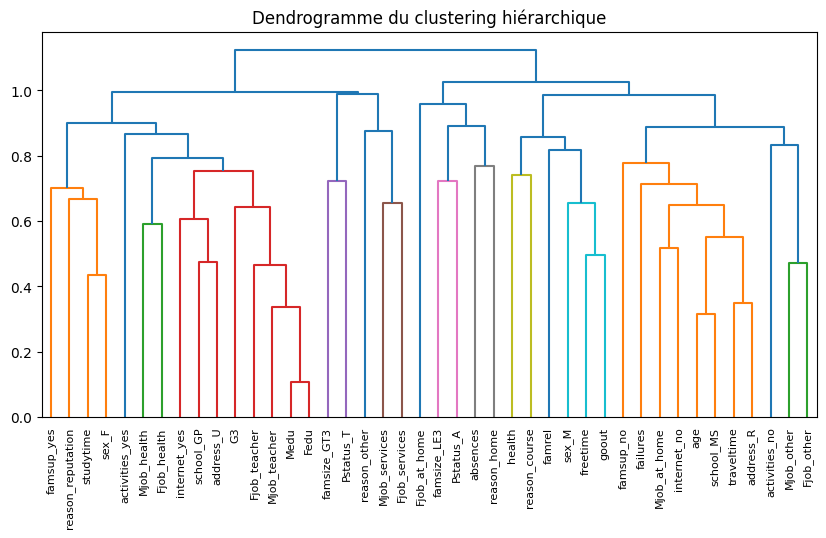

In [15]:
correlation_matrix = student_data_standarise.corr()
Z = hierarchy.linkage(correlation_matrix, method='average', metric='correlation')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, labels=correlation_matrix.columns)
plt.title('Dendrogramme du clustering hiérarchique')
plt.show()

In [16]:
distance_matrix = pdist(correlation_matrix)

# Calculer le coefficient de corrélation cophénétique
cophenet_coef, _ = cophenet(Z, distance_matrix)

print(f"Coefficient cophénétique : {cophenet_coef}")

Coefficient cophénétique : 0.49296289321365144


## Méthode single et métrique correlation





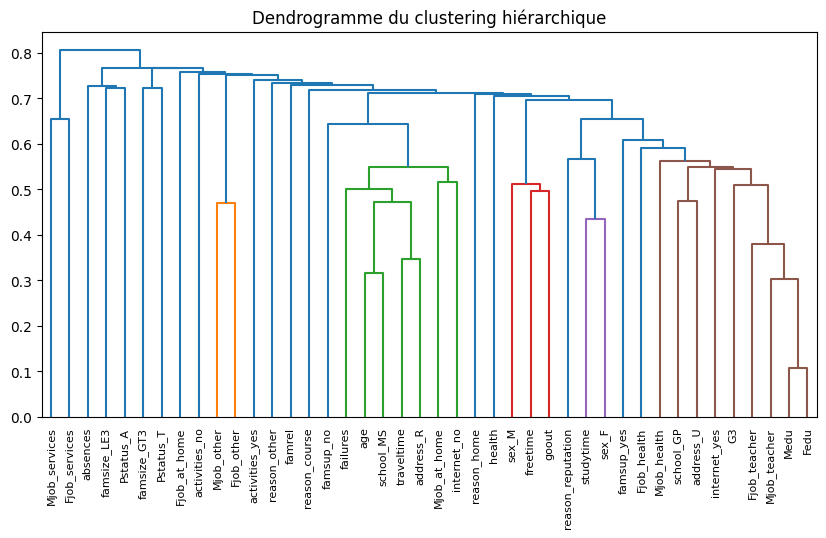

In [17]:
S = hierarchy.linkage(correlation_matrix, method='single', metric='correlation')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(S, labels=correlation_matrix.columns)
plt.title('Dendrogramme du clustering hiérarchique')
plt.show()

In [18]:
distance_matrix = pdist(correlation_matrix)

# Calculer le coefficient de corrélation cophénétique
cophenet_coef, _ = cophenet(S, distance_matrix)

print(f"Coefficient cophénétique : {cophenet_coef}")

Coefficient cophénétique : 0.32590449674672367


## Méthode complete et métrique correlation

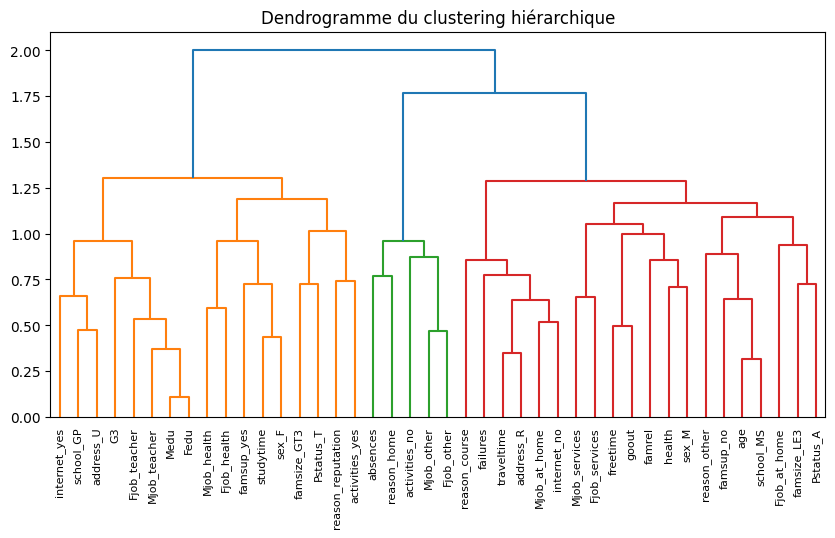

In [19]:
C = hierarchy.linkage(correlation_matrix, method='complete', metric='correlation')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(C, labels=correlation_matrix.columns)
plt.title('Dendrogramme du clustering hiérarchique')
plt.show()

In [20]:
distance_matrix = pdist(correlation_matrix)

# Calculer le coefficient de corrélation cophénétique
cophenet_coef, _ = cophenet(C, distance_matrix)

print(f"Coefficient cophénétique : {cophenet_coef}")

Coefficient cophénétique : 0.45946780426783035


## Méthode ward et métrique euclidienne

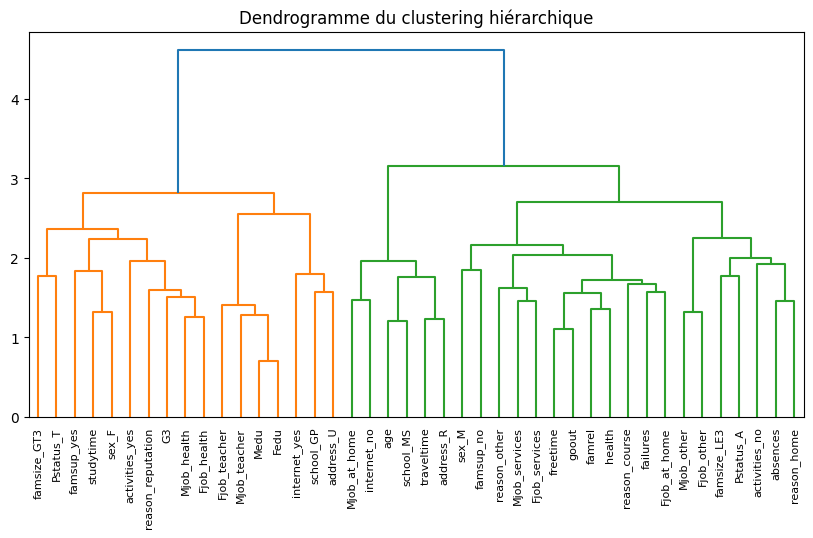

In [21]:
W = hierarchy.linkage(correlation_matrix, method='ward', metric='euclidean')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(W, labels=correlation_matrix.columns)
plt.title('Dendrogramme du clustering hiérarchique')
plt.show()

In [22]:
distance_matrix = pdist(correlation_matrix)

# Calculer le coefficient de corrélation cophénétique
cophenet_coef, _ = cophenet(W, distance_matrix)

print(f"Coefficient cophénétique : {cophenet_coef}")

Coefficient cophénétique : 0.47353450383544804


## Méthode average et métrique euclidiénne

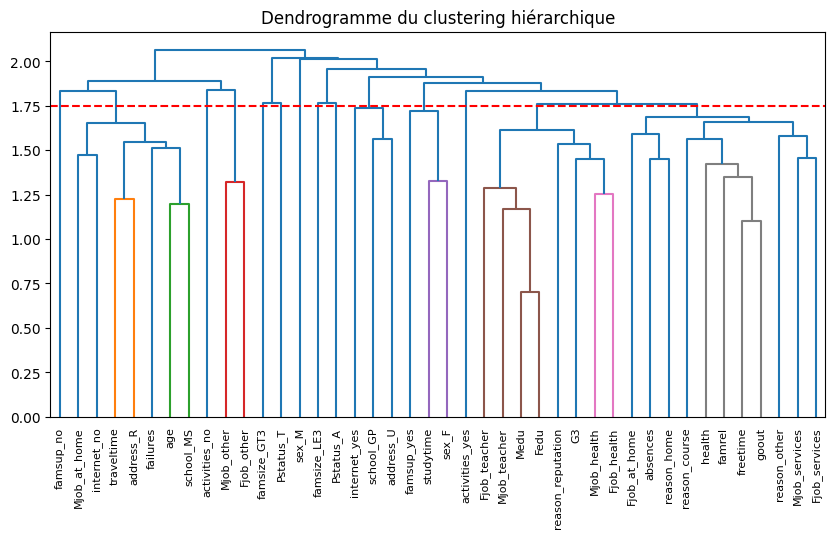

In [23]:
correlation_matrix = student_data_standarise.corr()
Z = hierarchy.linkage(correlation_matrix, method='average', metric='euclidean')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, labels=correlation_matrix.columns)
plt.title('Dendrogramme du clustering hiérarchique')
plt.axhline(y= 1.75, color='r', linestyle='--')
plt.show()

In [24]:
distance_matrix = pdist(correlation_matrix)

# Calculer le coefficient de corrélation cophénétique
cophenet_coef, _ = cophenet(Z, distance_matrix)

print(f"Coefficient cophénétique : {cophenet_coef}")

Coefficient cophénétique : 0.6157568645711968


## Méthode average et métrique cosine

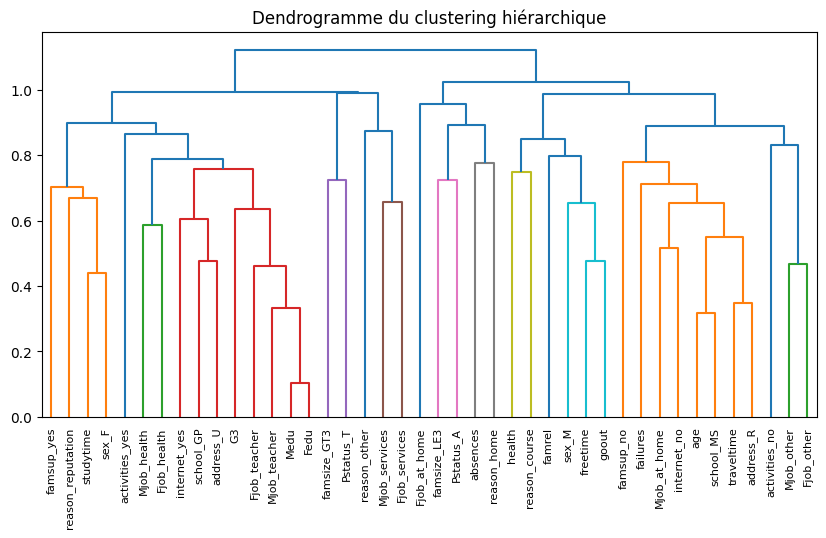

In [25]:
correlation_matrix = student_data_standarise.corr()
Z = hierarchy.linkage(correlation_matrix, method='average', metric='cosine')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, labels=correlation_matrix.columns)
plt.title('Dendrogramme du clustering hiérarchique')
plt.show()

In [26]:
distance_matrix = pdist(correlation_matrix)

# Calculer le coefficient de corrélation cophénétique
cophenet_coef, _ = cophenet(Z, distance_matrix)

print(f"Coefficient cophénétique : {cophenet_coef}")

Coefficient cophénétique : 0.4944197880346395


**Inteprétation des résultats :**

*   En utilisant la méthode average et la métrique euclidienne on a eu un coefficient cophénétique de 0.61, qui est la plus grande valeur de ce coefficient parmis toutes les combinaisons.
*   Cette valeur de ce coefficient montre que le clustering résultant de cette combinaison refléte bien la distance réelle entre les variables.
*   Le but de ce clustering est de trouver les variables qui sont les plus corrélées à la variable G3 qui représente la note des étudiants, ceci dit le résultat du clustering montre que :

  *   Le travail de la mére (Mjob)
  *   Le travail du pére (Fjob)
  *   L'éducation de la mére (Medu)
  *   L'éducation du pére (Fedu)
  *   La raison du choix de l'université (reason)
  *   L'absence (absences)
  *   La santé (health)
  *   La qualité de la relation avec la famille (famrel)
  *   Le temps libre (freetime)
  *   S'amuser (goout)

Ces variables sont celles qui affectent la note des étudiants.










# **Application de ACM MIXTE **

Alors maintenant vue que on a trouver les variables qui affectent la note des étudiants on va effectuer une étude ACM mixte pour prendre en considération les données numérique et catégorielle .

In [27]:
!pip install prince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 9.1 MB/s eta 0:00:00


In [28]:
import pandas as pd
from prince import MFA
import matplotlib.pyplot as plt

Define Categorical and Numerical Columns:


In [29]:
categorical_columns = ['Mjob', 'Fjob', 'Medu', 'Fedu', 'reason']
numerical_columns = ['absences', 'health', 'famrel', 'freetime', 'goout', 'G3']

In [30]:
selected_columns = categorical_columns + numerical_columns
new_student_df = student_df[selected_columns]

# Display the new DataFrame
print(new_student_df.head())

      Mjob      Fjob  Medu  Fedu  reason  absences  health  famrel  freetime  \
0  at_home   teacher     4     4  course         6       3       4         3   
1  at_home     other     1     1  course         4       3       5         3   
2  at_home     other     1     1   other        10       3       4         3   
3   health  services     4     2    home         2       5       3         2   
4    other     other     3     3    home         4       5       4         3   

   goout  G3  
0      4   6  
1      3   6  
2      2  10  
3      2  15  
4      2  10  


Create Separate Datasets for Different G3 Score Groups:

In [31]:
df_group1 = new_student_df[new_student_df['G3'] < 10]
df_group2 = new_student_df[(new_student_df['G3'] >= 10) & (new_student_df['G3'] < 14)]
df_group3 = new_student_df[(student_df['G3'] >= 14) & (student_df['G3'] < 16)]
df_group4 = new_student_df[student_df['G3'] >= 16]
df_group1.head()

,Mjob,Fjob,Medu,Fedu,reason,absences,health,famrel,freetime,goout,G3
0,at_home,teacher,4,4,course,6,3,4,3,4,6
1,at_home,other,1,1,course,4,3,5,3,3,6
7,other,teacher,4,4,home,6,1,4,1,4,6
10,teacher,health,4,4,reputation,0,2,3,3,3,9
18,services,services,3,2,course,16,5,5,5,5,5


In [32]:
categorical_columns = ['Mjob', 'Fjob', 'reason']
numerical_columns = ['absences', 'health', 'famrel', 'freetime', 'goout', 'G3']

<ipython-input-33-88d617113bb5>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Group'] = pd.cut(df[numerical_column], bins=bins, labels=labels, right=False)



MCA Coordinates for Group <10:
           0         1
0  -0.453679  1.006036
1  -0.772330  0.139380
7  -0.238525  0.443764
10  2.065689 -1.040361
18  0.250168  0.867781

Contributions for Group <10:
                      0     1
Mjob_at_home       0.03  0.05
Mjob_health        0.40  0.31
Mjob_other         0.27  0.15
Mjob_services      0.02  0.51
Mjob_teacher       0.27  0.00
Fjob_at_home       0.01  0.00
Fjob_health        0.99  0.04
Fjob_other         0.27  0.18
Fjob_services      0.20  0.34
Fjob_teacher       0.00  0.12
reason_course      0.20  0.00
reason_home        0.00  0.00
reason_other       0.01  0.87
reason_reputation  0.37  0.66


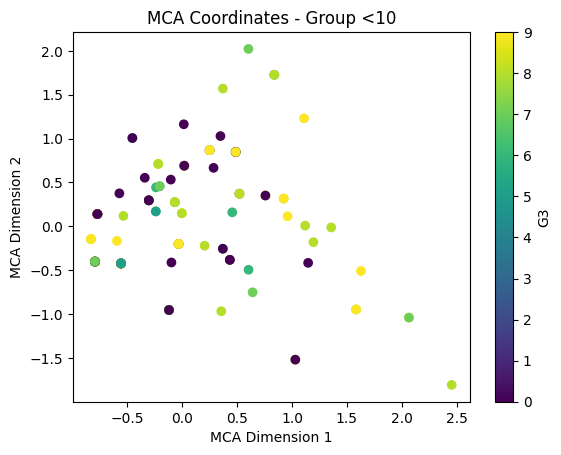


MCA Coordinates for Group 10-14:
           0         1
2  -0.117115  0.586727
4  -0.946490 -0.515141
6  -0.946490 -0.515141
11  0.587288 -0.347455
13 -0.121292  0.442649

Contributions for Group 10-14:
                      0     1
Mjob_at_home       0.00  0.01
Mjob_health        0.10  0.13
Mjob_other         0.37  0.14
Mjob_services      1.91  0.00
Mjob_teacher       0.00  0.68
Fjob_at_home       0.21  0.22
Fjob_health        0.00  0.00
Fjob_other         0.21  0.04
Fjob_services      0.60  0.09
Fjob_teacher       0.01  0.85
reason_course      0.02  0.00
reason_home        0.53  0.00
reason_other       0.00  2.12
reason_reputation  0.04  0.03


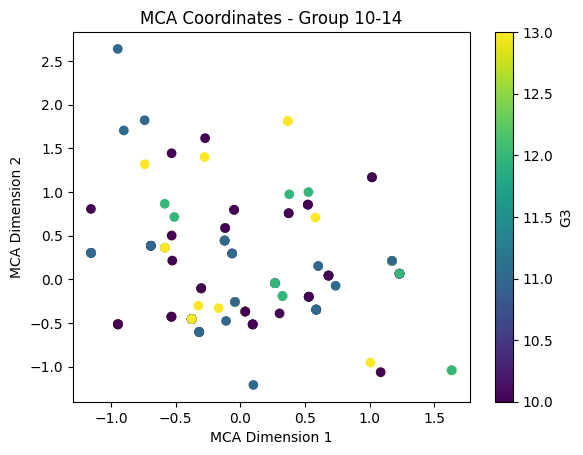


MCA Coordinates for Group 14-16:
           0         1
3  -0.084906  0.822603
5  -0.379946  0.025129
9   0.005474 -0.328884
12  0.035803  0.876564
15 -0.078263  0.418539

Contributions for Group 14-16:
                      0     1
Mjob_at_home       3.26  0.01
Mjob_health        0.03  0.64
Mjob_other         0.02  0.04
Mjob_services      0.00  0.02
Mjob_teacher       0.00  0.95
Fjob_at_home       2.43  0.00
Fjob_health        0.07  0.08
Fjob_other         0.00  0.00
Fjob_services      0.00  0.20
Fjob_teacher       0.00  2.14
reason_course      0.20  0.00
reason_home        0.03  0.00
reason_other       0.03  0.45
reason_reputation  0.21  0.00


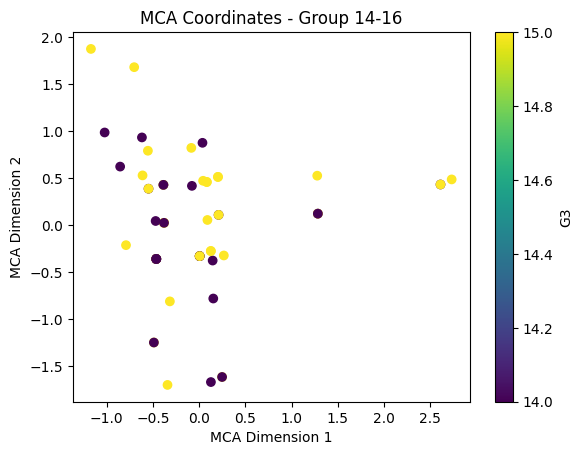


MCA Coordinates for Group >=16:
           0         1
8  -0.295688 -0.388576
14 -0.784495 -0.417444
22  0.441400 -0.661358
31 -0.541415  0.040637
32  1.622476  0.061150

Contributions for Group >=16:
                      0     1
Mjob_at_home       0.25  0.11
Mjob_health        0.03  1.39
Mjob_other         0.46  0.00
Mjob_services      0.00  0.01
Mjob_teacher       0.31  0.05
Fjob_at_home       0.50  0.05
Fjob_health        0.01  2.15
Fjob_other         0.12  0.05
Fjob_services      0.00  0.00
Fjob_teacher       0.24  0.01
reason_course      0.17  0.08
reason_home        0.00  0.00
reason_other       0.11  0.96
reason_reputation  0.82  0.00


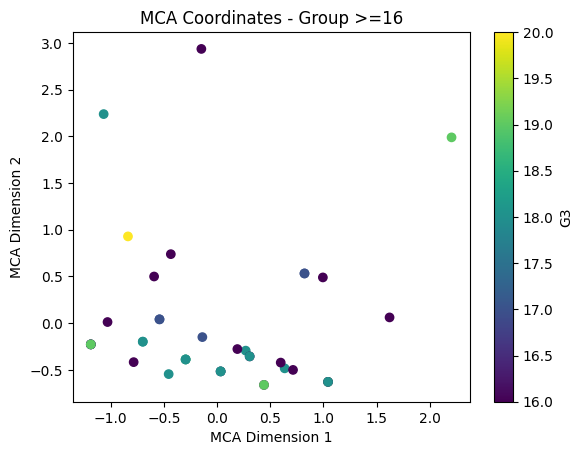

In [33]:
import pandas as pd
import prince
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with your categorical variables
# Replace this with your actual data
df = new_student_df

# Extract categorical columns
categorical_columns = ['Mjob', 'Fjob', 'reason']
numerical_column = 'G3'

# Define bins for G3 groups
bins = [-float('inf'), 10, 14, 16, float('inf')]
labels = ['<10', '10-14', '14-16', '>=16']

# Create a new column 'Group' based on G3 values
df['Group'] = pd.cut(df[numerical_column], bins=bins, labels=labels, right=False)

# Initialize an empty dictionary to store MCA results for each group
mca_results_by_group = {}

# Loop through each group and perform MCA
for group_label, group_df in df.groupby('Group'):
    mca_group = prince.MCA()
    mca_group.fit(group_df[categorical_columns])

    # Store MCA results for the group

    mca_results_by_group[group_label] = mca_group

    # Access MCA results
    coordinates = mca_group.transform(group_df[categorical_columns])
    contributions = 100 * (mca_group.column_contributions_ ** 2) / mca_group.total_inertia_
    contributions = contributions.round(2)

    # Print or use the obtained information as needed
    print(f"\nMCA Coordinates for Group {group_label}:")
    print(coordinates.head())

    print(f"\nContributions for Group {group_label}:")
    print(contributions)

    # Plot MCA coordinates
    plt.scatter(coordinates.iloc[:, 0], coordinates.iloc[:, 1], c=group_df[numerical_column], cmap='viridis')
    plt.title(f'MCA Coordinates - Group {group_label}')
    plt.xlabel('MCA Dimension 1')
    plt.ylabel('MCA Dimension 2')
    plt.colorbar(label=numerical_column)
    plt.show()


<ipython-input-35-06769dc1e8ff>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Group'] = pd.cut(df[numerical_column], bins=bins, labels=labels, right=False)



MCA Coordinates for Group <10:
           0         1
0  -0.453679  1.006036
1  -0.772330  0.139380
7  -0.238525  0.443764
10  2.065689 -1.040361
18  0.250168  0.867781


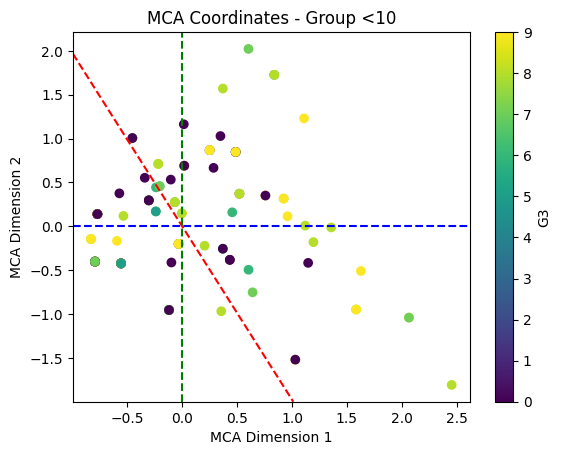


MCA Coordinates for Group 10-14:
           0         1
2  -0.117115  0.586727
4  -0.946490 -0.515141
6  -0.946490 -0.515141
11  0.587288 -0.347455
13 -0.121292  0.442649


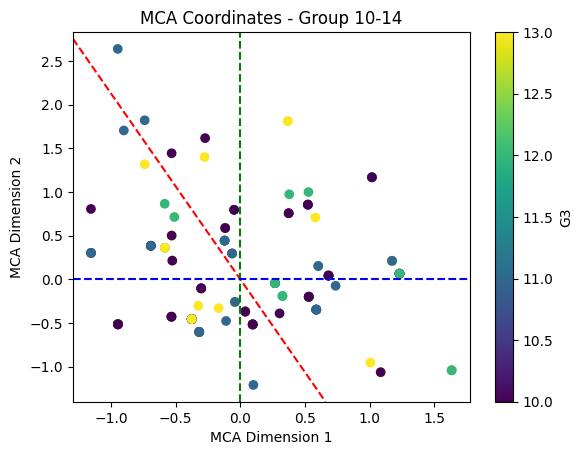


MCA Coordinates for Group 14-16:
           0         1
3  -0.084906  0.822603
5  -0.379946  0.025129
9   0.005474 -0.328884
12  0.035803  0.876564
15 -0.078263  0.418539


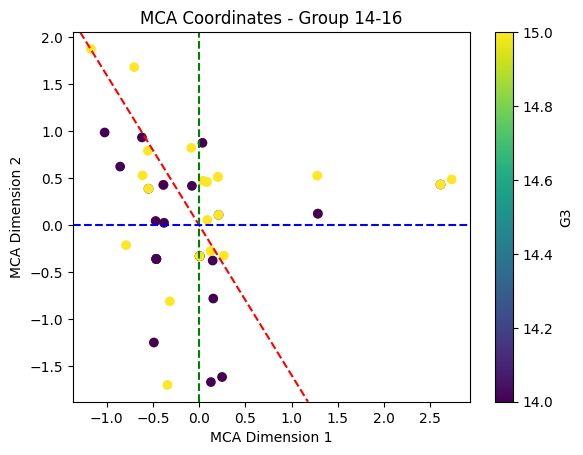


MCA Coordinates for Group >=16:
           0         1
8  -0.295688 -0.388576
14 -0.784495 -0.417444
22  0.441400 -0.661358
31 -0.541415  0.040637
32  1.622476  0.061150


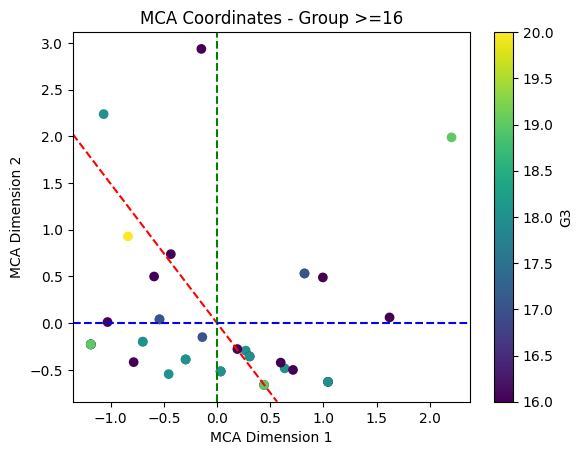

In [35]:
import pandas as pd
import prince
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with your categorical variables
# Replace this with your actual data
df = new_student_df

# Extract categorical columns
categorical_columns = ['Mjob', 'Fjob', 'reason']
numerical_column = 'G3'

# Define bins for G3 groups
bins = [-float('inf'), 10, 14, 16, float('inf')]
labels = ['<10', '10-14', '14-16', '>=16']

# Create a new column 'Group' based on G3 values
df['Group'] = pd.cut(df[numerical_column], bins=bins, labels=labels, right=False)

# Initialize an empty dictionary to store MCA results for each group
mca_results_by_group = {}

# Loop through each group and perform MCA
for group_label, group_df in df.groupby('Group'):
    mca_group = prince.MCA()
    mca_group.fit(group_df[categorical_columns])

    # Store MCA results for the group
    mca_results_by_group[group_label] = mca_group

    # Access MCA results
    coordinates = mca_group.transform(group_df[categorical_columns])

    # Print or use the obtained information as needed
    print(f"\nMCA Coordinates for Group {group_label}:")
    print(coordinates.head())

    # Plot MCA coordinates
    plt.scatter(coordinates.iloc[:, 0], coordinates.iloc[:, 1], c=group_df[numerical_column], cmap='viridis')
    plt.title(f'MCA Coordinates - Group {group_label}')
    plt.xlabel('MCA Dimension 1')
    plt.ylabel('MCA Dimension 2')
    plt.colorbar(label=numerical_column)

    # Plot a line perpendicular to the first dimension through the origin (0,0)
    plt.axline((0, 0), slope=-1/mca_group.eigenvalues_[0], color='red', linestyle='--')

    # Plot vertical line at x=0
    plt.axvline(x=0, color='green', linestyle='--')

    # Plot horizontal line at y=0
    plt.axhline(y=0, color='blue', linestyle='--')

    plt.show()



## GROUP1 G3 < 10
Pour le groupe où G3 < 10 :


1. **Mjob_health** : Une forte contribution à la Dimension 1 et à la Dimension 2, indiquant une influence significative dans ce groupe.

2. **Fjob_health** : Contribution très élevée à la Dimension 1, montrant une influence prépondérante.

3. **reason_reputation** : Contribution notable à la Dimension 1 et à la Dimension 2, suggérant une importance dans ce contexte.

4. **Mjob_services** : Contribution significative à la Dimension 2, avec une influence modérée à la Dimension 1.

5. **Fjob_services** : Une contribution modérée à la Dimension 2.

6. **Mjob_other** : Une contribution modeste à la Dimension 1 et à la Dimension 2.

7. **Fjob_other** : Contribution modérée à la Dimension 2.

8. **Fjob_teacher** : Faible contribution à la Dimension 2.

9. **Mjob_at_home**, **Fjob_at_home**, **reason_course**, **reason_home**, **reason_other** : Contributions relativement faibles.

Ces résultats suggèrent que, pour ce groupe, les types d'emploi liés à la santé (health) et la réputation de la raison (reason_reputation) ont une influence significative sur la position des observations dans les deux dimensions de l'ACM. Les services semblent également jouer un rôle, surtout pour la Dimension 2. Les autres catégories ont des contributions moins marquées.

# GROUP G3 >10 ET G3 < 14



1. **Mjob_services** : Contribution très élevée à la Dimension 1 et une forte influence à la Dimension 2, suggérant une importance significative dans ce groupe.

2. **Fjob_teacher** : Contribution élevée à la Dimension 2, indiquant une influence marquée dans cette dimension.

3. **reason_other** : Contribution très élevée à la Dimension 2, suggérant une influence prédominante dans ce contexte.

4. **Fjob_services** : Contribution notable à la Dimension 2.

5. **Mjob_other** : Contribution significative à la Dimension 1 et à la Dimension 2.

6. **Mjob_health**, **Fjob_at_home**, **Fjob_other**, **Fjob_health**, **Fjob_teacher**, **reason_course**, **reason_reputation** : Contributions relativement faibles.

7. **Mjob_at_home**, **reason_home** : Contributions très faibles.

Ces résultats indiquent que, pour ce groupe, les types d'emploi liés aux services (services) ont une influence significative sur la position des observations dans les deux dimensions de l'ACM. De plus, les catégories telles que reason_other et Mjob_other ont également des contributions importantes à la Dimension 2. Les autres catégories ont des contributions moins marquées dans ce groupe.

# **GROUPE 14 <= G3 < 16 **
Pour le groupe où G3 est compris entre 14 et 16:


1. **Fjob_teacher** : Contribution très élevée à la Dimension 1 et très forte influence à la Dimension 2, suggérant une importance significative dans ce groupe.

2. **Mjob_at_home** : Contribution très élevée à la Dimension 1.

3. **Fjob_at_home** : Contribution élevée à la Dimension 1.

4. **Mjob_health** : Contribution élevée à la Dimension 2.

5. **Fjob_services** : Contribution importante à la Dimension 2.

6. **Fjob_health**, **Mjob_other**, **Mjob_services**, **Fjob_other**, **Fjob_teacher**, **reason_other**, **reason_reputation** : Contributions relativement faibles.

7. **Mjob_teacher**, **Fjob_health**, **Fjob_other**, **reason_course**, **reason_home** : Contributions très faibles.

Ces résultats indiquent que, pour ce groupe, les types d'emploi liés à l'enseignement (Fjob_teacher) ont une influence significative sur la position des observations dans les deux dimensions de l'ACM. De plus, les catégories telles que Mjob_at_home et Fjob_at_home ont également des contributions importantes à la Dimension 1. Les autres catégories ont des contributions moins marquées dans ce groupe.

# **GROUP G3 < 16 **


Pour le groupe où G3 est supérieur ou égal à 16

1. **reason_reputation** : Contribution très élevée à la Dimension 1 et aucune contribution à la Dimension 2, indiquant une influence significative dans ce groupe.

2. **Fjob_health** : Contribution très élevée à la Dimension 2.

3. **Mjob_other**, **Fjob_at_home**, **Mjob_teacher**, **Fjob_teacher** : Contributions importantes à la Dimension 1.

4. **Mjob_at_home**, **Mjob_services**, **Mjob_teacher**, **Fjob_other**, **Fjob_services**, **Fjob_teacher**, **reason_course**, **reason_home**, **reason_other** : Contributions relativement faibles.

5. **Mjob_health**, **Fjob_at_home**, **Fjob_health**, **Fjob_other**, **reason_home** : Contributions très faibles ou nulles.

Ces résultats suggèrent que, pour ce groupe, la réputation de la raison (reason_reputation) a une influence significative sur la position des observations dans la première dimension de l'ACM, tandis que le type d'emploi lié à la santé (Fjob_health) a une influence significative sur la deuxième dimension. Les autres catégories ont des contributions moins marquées dans ce groupe.

In [122]:
eigenvalues = mca.eigenvalues_

print("Eigenvalues:")
print(eigenvalues)

Eigenvalues:
[0.46266927 0.44113947]


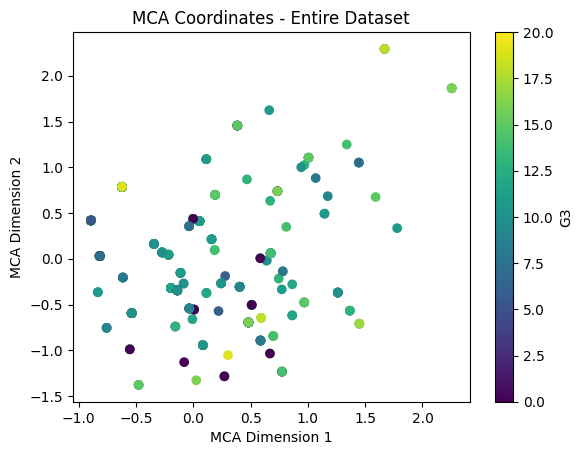

In [89]:
from prince import MCA

categorical_columns = ['Mjob', 'Fjob', 'reason']
numerical_columns = ['G3']

selected_columns = categorical_columns + numerical_columns
new_student_df = student_df[selected_columns]

# Perform MCA on the entire dataset
def perform_mca(data, categorical_cols):
    mca = MCA()
    mca.fit(data[categorical_cols])
    return mca

# Perform MCA on the entire dataset
mca_full_dataset = perform_mca(new_student_df, categorical_columns)

def plot_mca_results(mca, group_name, data, categorical_cols):
    # Get MCA coordinates
    coordinates = mca.transform(data[categorical_cols])

    # Plot MCA coordinates
    plt.scatter(coordinates.iloc[:, 0], coordinates.iloc[:, 1], c=data['G3'], cmap='viridis')
    plt.title(f'MCA Coordinates - {group_name}')
    plt.xlabel('MCA Dimension 1')
    plt.ylabel('MCA Dimension 2')
    plt.colorbar(label='G3')
    plt.show()

# Plot results for the entire dataset
plot_mca_results(mca_full_dataset, 'Entire Dataset', new_student_df, categorical_columns)


## pour group1
Le fait que 'm_job', 'm_health' et 'f_health' aient une forte contribution à la Dimension 1 de l'ACM suggère que ces variables sont étroitement liées ou présentent des patterns similaires dans les données

'mjob_health' et 'mjob_services' peuvent indiquer des professions ou des emplois liés à la santé ou aux services. Si ces catégories sont fortement associées à la première dimension de l'ACM et que le groupe 'G3 <10' est également proche de cette dimension, cela pourrait suggérer que les élèves dont les mères ont des emplois liés à la santé ou aux services ont tendance à avoir des performances académiques plus faibles.

De même, si 'fjob_health' indique que le père a un emploi lié à la santé et que cette catégorie est associée à la première dimension de l'ACM, cela pourrait également contribuer à l'influence sur les performances académiques plus faibles dans le groupe 'G3 <10'.

'reason_reputation' pourrait indiquer que le choix de l'école est basé sur la réputation. Si cette modalité est associée à la première dimension et également au groupe 'G3 <10', cela pourrait signifier que, dans ce groupe, les élèves dont le choix d'école est basé sur la réputation ont des performances académiques inférieures.





 group 2
